# Wizard Card Gan

This notebook is a small project of making a gan which can produce Harry Potter Wizard Cards. These cards come from the original first three Harry Potter video games on PC where I was able to download and use assets from the game. I do not own the cards or know of their Copywrite status, but this is for educational purposes only. 

The GAN I created and the code I used comes from the fastai documentation, and I only added a few minor changes to it to get the GAN to work. Most of the work was around hyperparameter tuning. I ran into a few problems, as GANs can be difficult to train, even when using a straightforward one like the [wgan](https://lilianweng.github.io/lil-log/2017/08/20/from-GAN-to-WGAN.html). 

The first was, the resize method fastai used by default uses a crop, but it uses random crops which made it more difficult to learn the shape of the wizard card. This caused a fragmentation to get generated where points of the pentagon shape would be multiplied and look stuttery. 

The next issue I encountered was the images had transparent backgrounds because they were png, so the default way to handle that is the most outer color gets chosen. But I wanted a constant background so I just converted them all to jpg and that solved that problem.

Finally, the last problem I had was due to the amount of data. Because I only had about ~200 images I needed more data, so I used augmentation. The only thing is I had to keep it mild because I found that too extreme augmentation also wouldn't allow my model to converge well.

Altogether this was a great learning experience in how GANs are trained. I would also highly suggest checking out the [fastai docs](https://docs.fast.ai/vision.gan.html) as they have a lot of great learning content and their docs have great starter code. This took about ~1.5 hours on a single GPU for ~1,850 epochs.

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastai.vision import *
from fastbook import *
from fastai.vision.gan import *

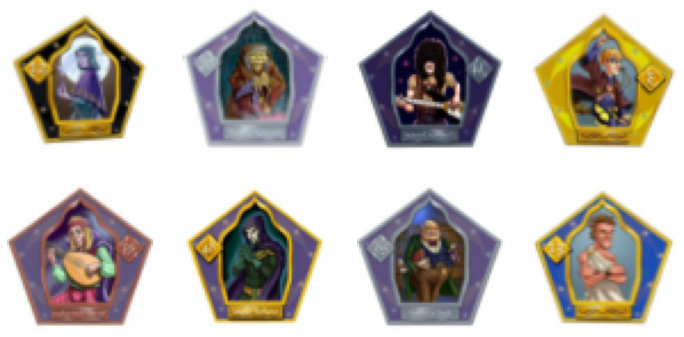

In [2]:
bs = 8
size = 64

dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms= Resize(size, method=ResizeMethod.Squish), 
                   batch_tfms = [*aug_transforms(min_scale = 1, min_zoom=.85, max_zoom=1, max_warp = .12, max_rotate=.12, p_affine=.4, pad_mode='border', p_lighting=.4, max_lighting = .3), 
                                 Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))])

                   
path = "Data/"

dls = dblock.dataloaders(path, path=path, bs=bs)

dls[0].show_batch(max_n=8)



epoch,train_loss,gen_loss,crit_loss,time
0,-0.275925,0.296386,-0.439764,00:02
1,-0.684678,0.581664,-1.195282,00:02
2,-0.872264,0.700578,-1.388748,00:02
3,-0.973834,0.724844,-1.442941,00:02
4,-1.029138,0.739020,-1.454379,00:02
5,-1.062465,0.739678,-1.462794,00:02
6,-1.079697,0.743461,-1.458854,00:02
7,-1.092483,0.742338,-1.465486,00:02
8,-1.099822,0.741858,-1.464277,00:02
9,-1.106042,0.744863,-1.470874,00:02


/opt/conda/envs/fastai/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


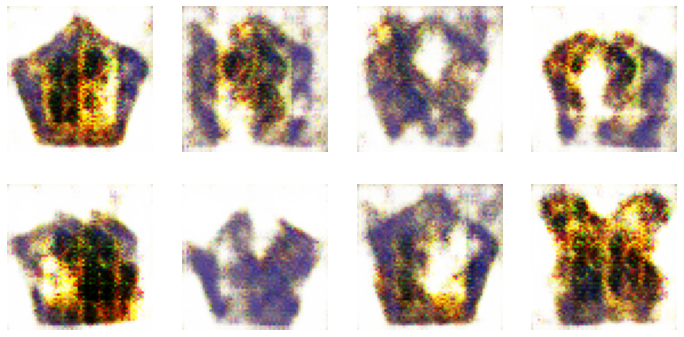

In [3]:
from fastai.callback.all import *

generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

learn.fit(100, 2e-4, wd=0.)

learn.show_results(max_n=9, ds_idx=0)



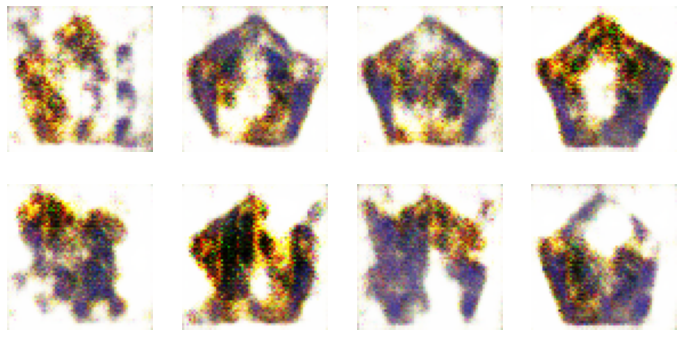

In [4]:
learn.show_results(max_n=9, ds_idx=0)

In [5]:
learn.fit(150, 2e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.957154,0.676552,-1.307106,00:02
1,-1.010243,0.603418,-1.346142,00:02
2,-0.936754,0.670261,-1.143711,00:02
3,-0.925959,0.689775,-1.239021,00:02
4,-0.947737,0.678337,-1.320763,00:02
5,-0.946153,0.665888,-1.224679,00:02
6,-0.938459,0.671397,-1.178550,00:02
7,-0.990466,0.726881,-1.405656,00:02
8,-0.952627,0.707836,-1.191602,00:02
9,-0.978616,0.705672,-1.366861,00:02


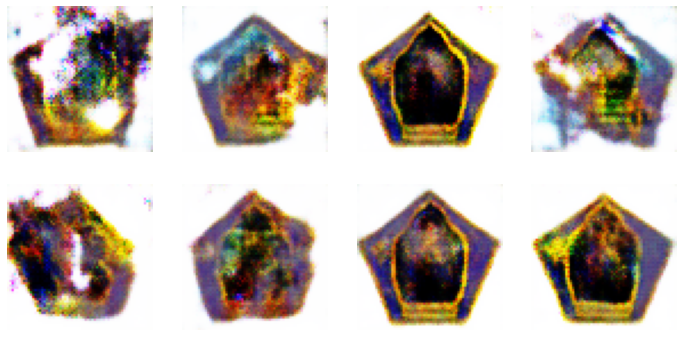

In [6]:
#1
learn.show_results(max_n=9, ds_idx=0)

In [7]:
learn.fit(300, 2e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.984067,0.639862,-1.337869,00:02
1,-0.932401,0.688121,-1.179063,00:02
2,-0.901844,0.606074,-1.159218,00:02
3,-0.962429,0.703230,-1.370732,00:02
4,-0.925065,0.713810,-1.206540,00:02
5,-0.892619,0.457580,-1.066611,00:02
6,-0.954121,0.719291,-1.380097,00:02
7,-0.892182,0.664770,-1.116418,00:02
8,-0.928153,0.655743,-1.286085,00:02
9,-0.934548,0.709396,-1.264171,00:02


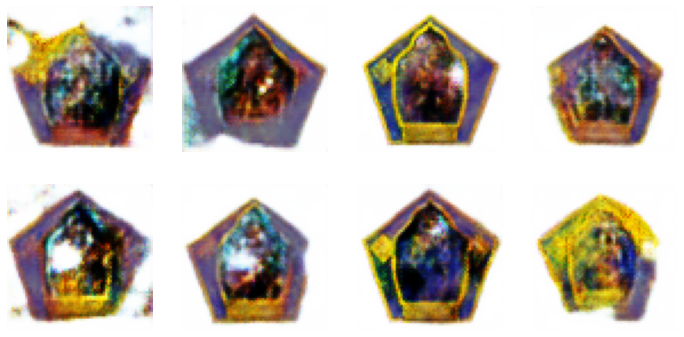

In [8]:
learn.show_results(max_n=9, ds_idx=0)

In [9]:
learn.fit(400, 1e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.987093,0.666739,-1.343879,00:02
1,-0.995386,0.668124,-1.314982,00:02
2,-1.002012,0.673126,-1.323726,00:02
3,-1.001284,0.692291,-1.319700,00:02
4,-0.965637,0.561796,-1.203373,00:02
5,-0.981435,0.671442,-1.319287,00:02
6,-0.990077,0.670181,-1.322997,00:02
7,-0.994474,0.655201,-1.312153,00:02
8,-0.955610,0.623624,-1.205918,00:02
9,-0.972683,0.662949,-1.308029,00:02


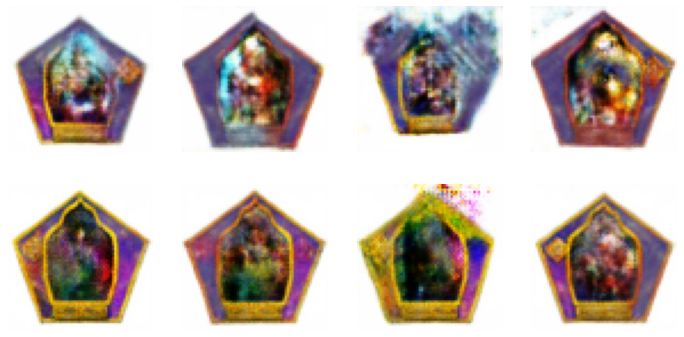

In [10]:
learn.show_results(max_n=9, ds_idx=0)

In [11]:
learn.fit(400, 1e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.923257,0.672925,-1.256533,00:02
1,-0.881014,0.659549,-1.164975,00:02
2,-0.899409,0.548567,-1.174255,00:02
3,-0.897940,0.603157,-1.187974,00:02
4,-0.913307,0.646289,-1.234457,00:02
5,-0.895075,0.608850,-1.174123,00:02
6,-0.907645,0.652602,-1.207767,00:02
7,-0.892022,0.598626,-1.171556,00:02
8,-0.875047,0.566367,-1.091869,00:02
9,-0.893404,0.632751,-1.215453,00:02


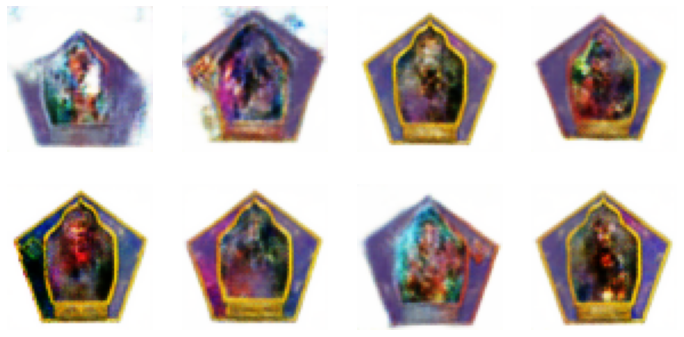

In [12]:
learn.show_results(max_n=24, ds_idx=0)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.896723,0.578384,-1.215692,00:02
1,-0.841185,0.582759,-1.089338,00:02
2,-0.866358,0.640897,-1.166931,00:02
3,-0.869066,0.613376,-1.156113,00:02
4,-0.884368,0.617519,-1.187998,00:02
5,-0.864202,0.437348,-1.098721,00:02
6,-0.821647,0.581744,-0.985033,00:02
7,-0.793748,0.643443,-1.051308,00:02
8,-0.816997,0.565825,-1.119842,00:02
9,-0.818261,0.632548,-1.092999,00:02


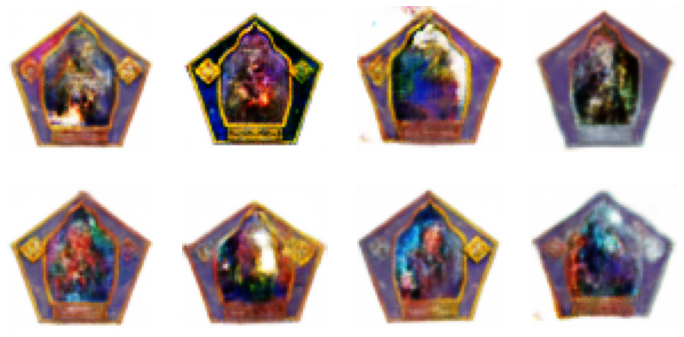

In [13]:
learn.fit(500, 1e-4, wd=0.)
learn.show_results(max_n=24, ds_idx=0)

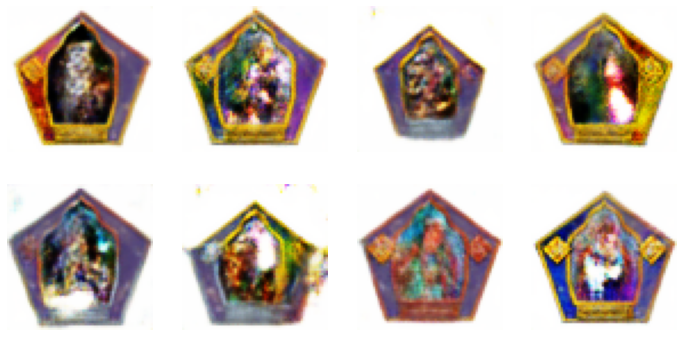

In [14]:
learn.show_results(max_n=24, ds_idx=0)